In [2]:
! pip install -u imblearn-learn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import tensorflow_hub as hub
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv(r'C:\Users\SunInternet.ir\Desktop\diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

In [7]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(Y,(-1,1))))
transform_df = pd.DataFrame(data,columns=df.columns)

In [9]:
over = RandomOverSampler()
X,Y = over.fit_resample(X,Y)
data = np.hstack((X,np.reshape(Y,(-1,1))))
transform_df = pd.DataFrame(data,columns=df.columns)

In [10]:
len(transform_df[transform_df['Outcome']==1]),len(transform_df[transform_df['Outcome']==0])

(500, 500)

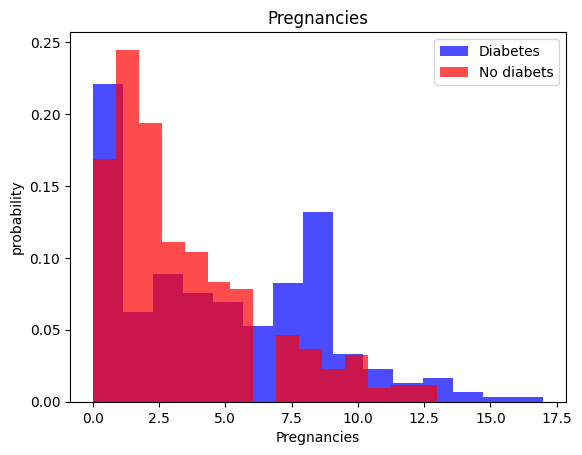

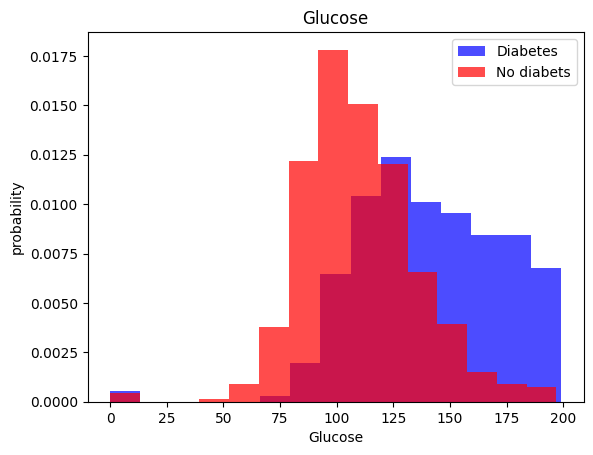

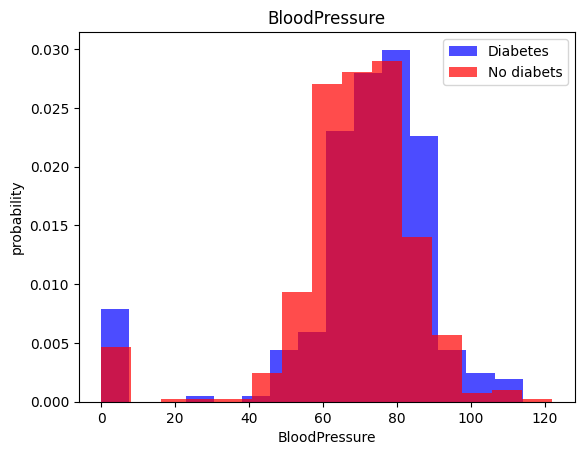

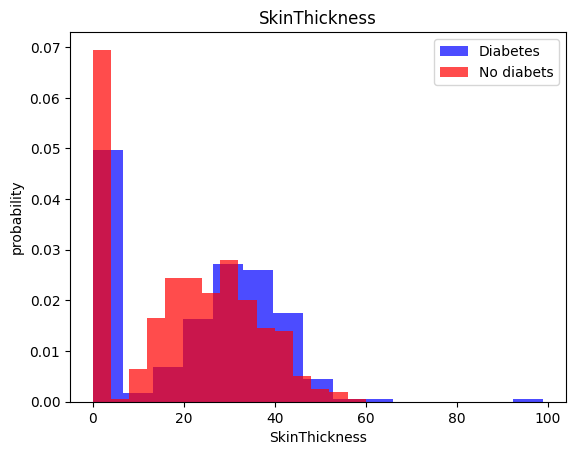

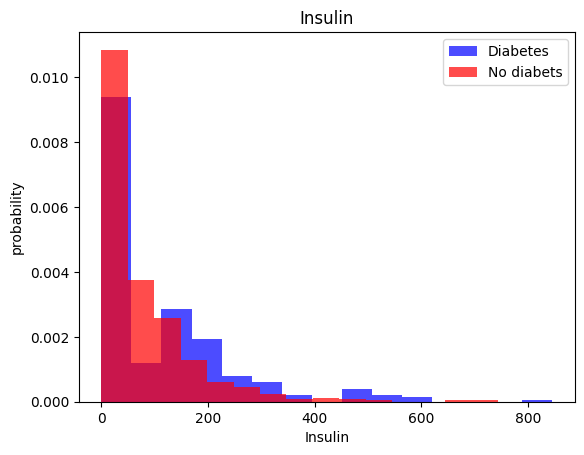

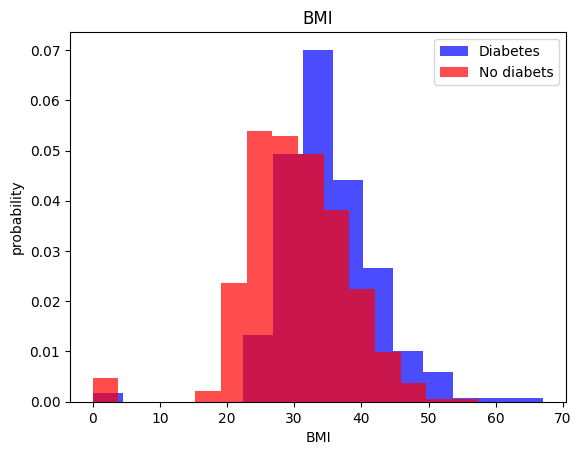

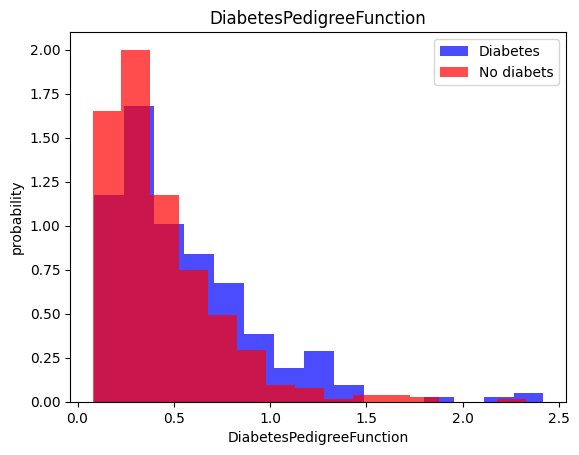

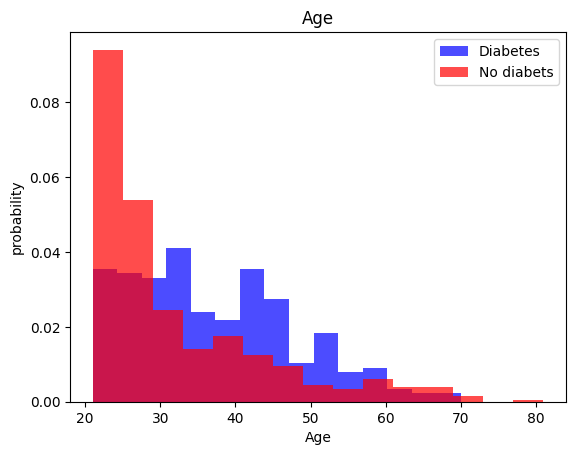

In [14]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label],color='blue',label='Diabetes',alpha=0.7,density=True,bins=15)
    plt.hist(df[df['Outcome'] == 0][label],color='red',label='No diabets',alpha=0.7,density=True,bins=15)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [ ]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [ ]:
X.shape,Y.shape

((768, 8), (768,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(Y,(-1,1))))
transform_df = pd.DataFrame(data,columns=df.columns)

In [ ]:
X

array([[ 0.5804075 ,  0.66544113,  0.14544669, ...,  0.11138663,
         0.37706858,  1.38246741],
       [-0.87936992, -1.22169778, -0.14997651, ..., -0.80172546,
        -0.42883317, -0.25736782],
       [ 1.16431847,  1.71385163, -0.24845091, ..., -1.23219259,
         0.50846561, -0.17106071],
       ...,
       [ 2.91605138, -0.772379  ,  0.44086989, ...,  0.50272038,
        -0.2507172 ,  1.03723894],
       [ 0.28845202,  1.26453284, -0.24845091, ...,  0.02007542,
        -1.05953889,  0.60570335],
       [ 0.28845202,  0.33594068,  1.91798589, ...,  2.09414431,
        -0.79090497,  0.26047488]])

In [ ]:
X_train ,X_temp,Y_train,Y_temp = train_test_split(X,Y,test_size = 0.4 ,random_state=0)
X_valid ,X_test,Y_valid,Y_test = train_test_split(X_temp,Y_temp,test_size = 0.4 ,random_state=0)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'), # if x <= 0 --> 0 ,x > 0 --> x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
model.evaluate(X_train,Y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4718 - loss: 0.7075  


[0.7070383429527283, 0.47833332419395447]

In [ ]:
model.evaluate(X_valid,Y_valid)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4255 - loss: 0.7293 


[0.7273494005203247, 0.4583333432674408]

In [ ]:
model.fit(X_train,Y_train,batch_size = 16, epochs = 20, validation_data = (X_valid,Y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5070 - loss: 0.6910 - val_accuracy: 0.5250 - val_loss: 0.6793
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5790 - loss: 0.6557 - val_accuracy: 0.6125 - val_loss: 0.6433
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6850 - loss: 0.6291 - val_accuracy: 0.6917 - val_loss: 0.6155
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7533 - loss: 0.6062 - val_accuracy: 0.7250 - val_loss: 0.5891
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.5919 - val_accuracy: 0.7667 - val_loss: 0.5629
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7537 - loss: 0.5550 - val_accuracy: 0.7500 - val_loss: 0.5365
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.5620 - val_accuracy: 0.7500 - val_loss: 0.5157
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 0.5172 - val_accuracy: 0.7458 - val_loss:

In [ ]:
model.evaluate(X_test,Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.4030 


[0.4409618377685547, 0.8062499761581421]